<Figure size 2000x1000 with 0 Axes>

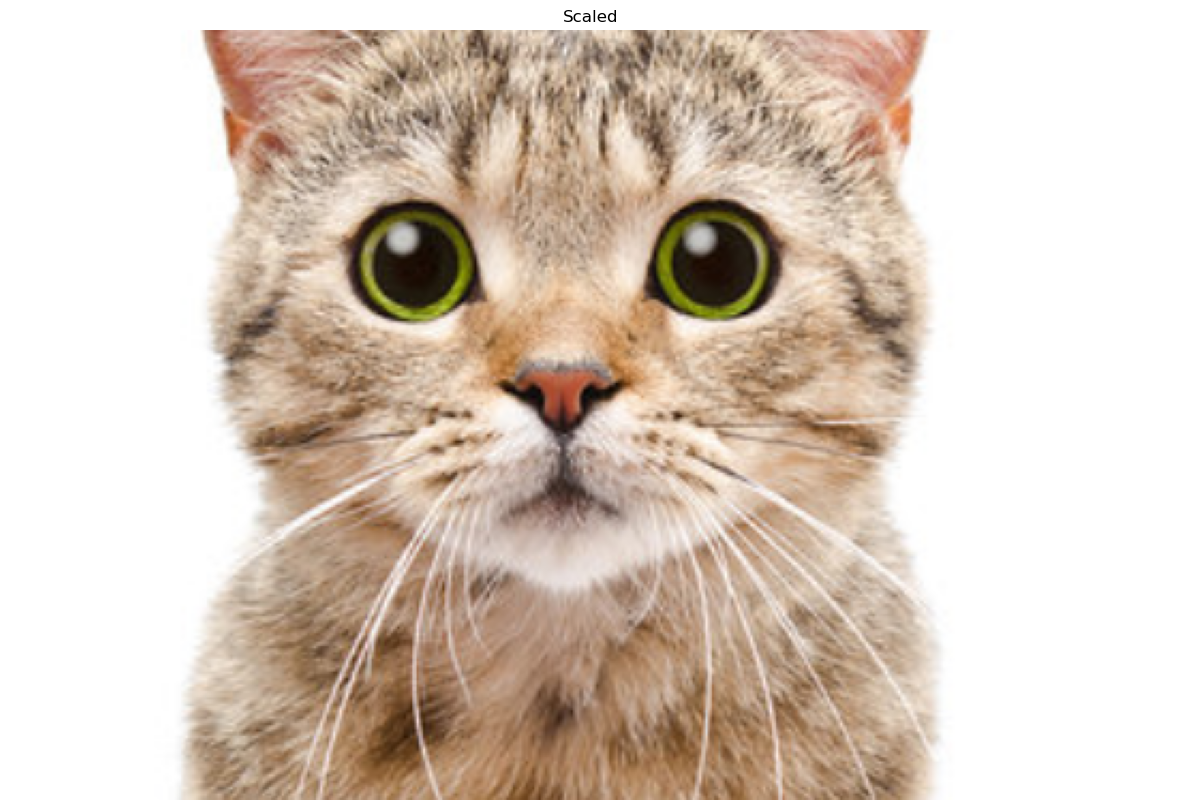

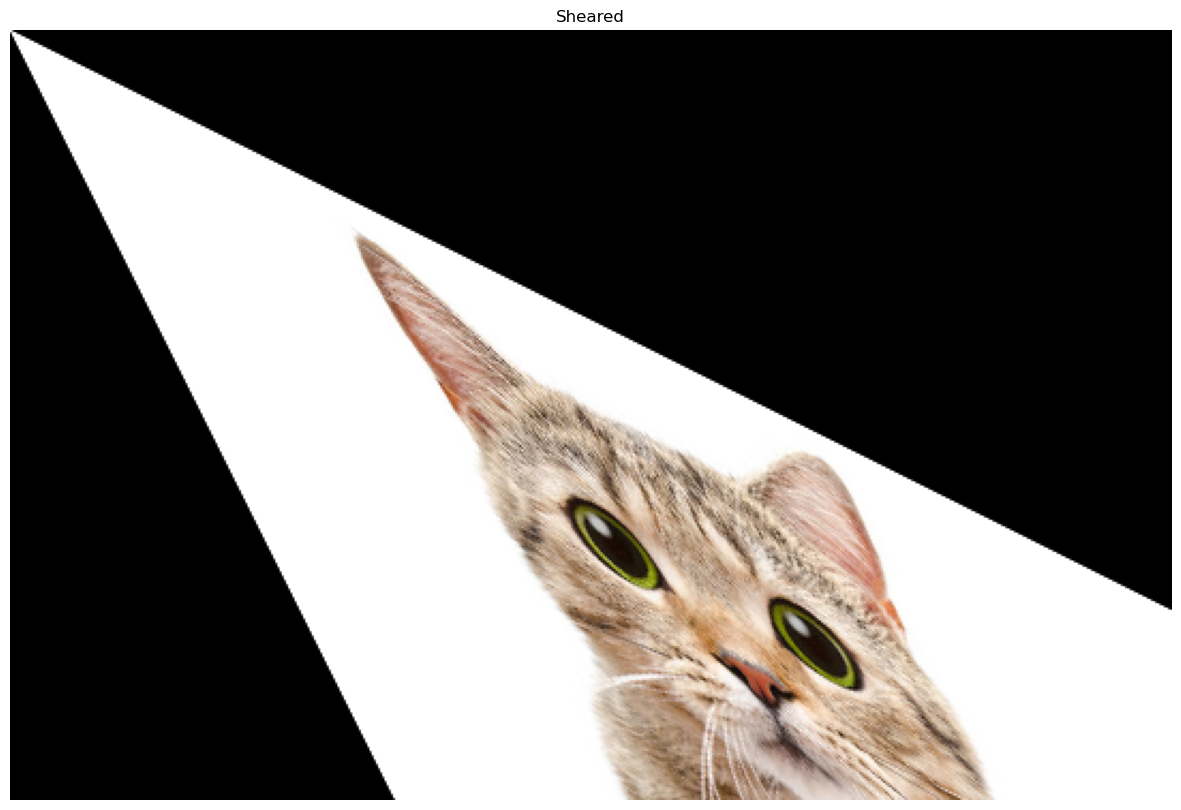

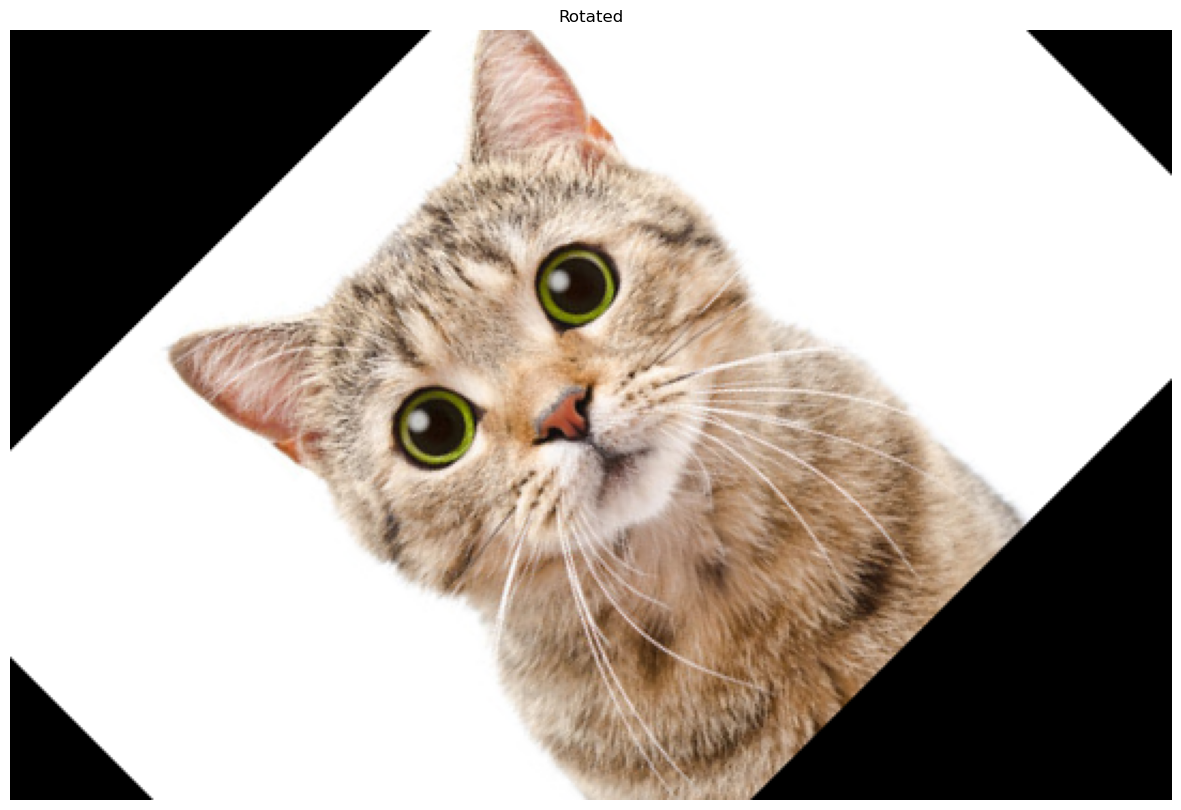

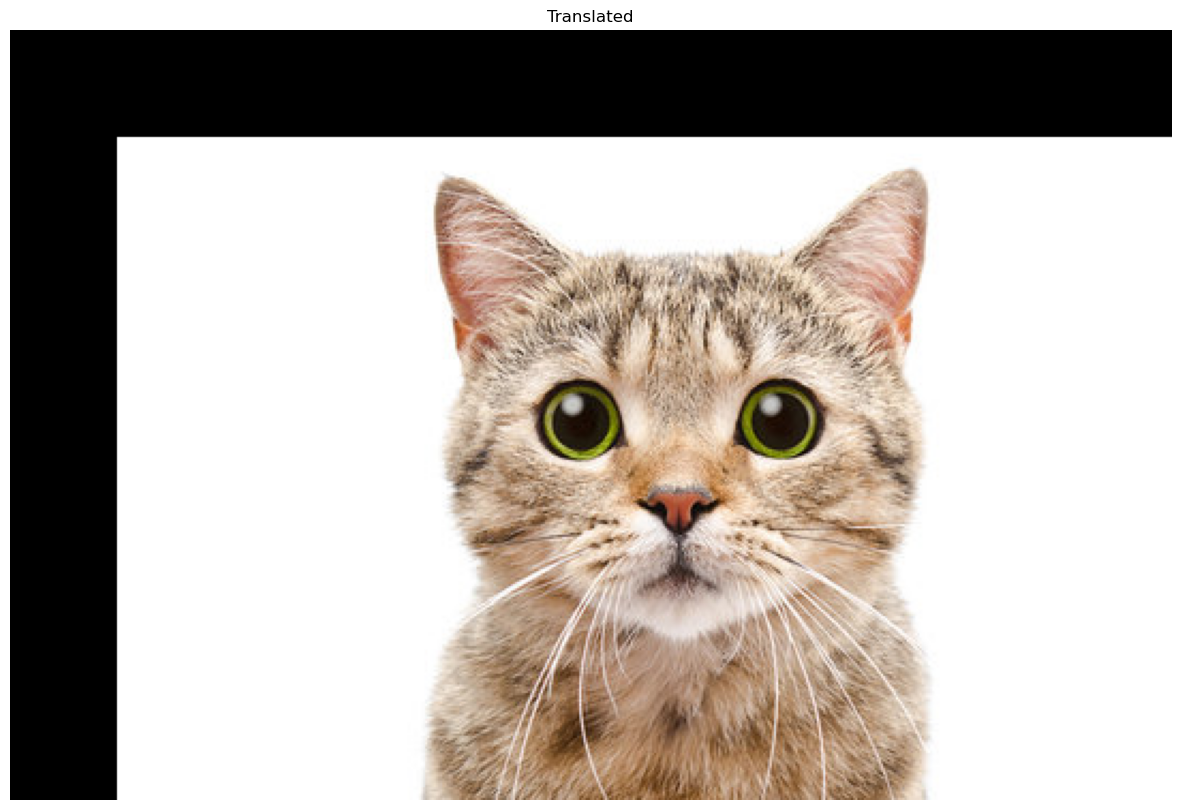

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = "./cat.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width = image.shape[:2]

# Define the transformations
def apply_transformations(image):
    h, w = image.shape[:2]
    center = (w // 2, h // 2)

    # Scaling
    scale_matrix = cv2.getRotationMatrix2D(center, 0, 1.5)
    scaled_image = cv2.warpAffine(image, scale_matrix, (w, h))

    # Shearing
    shear_matrix = np.array([
        [1, 0.5, 0],
        [0.5, 1, 0]
    ], dtype=float)
    sheared_image = cv2.warpAffine(image, shear_matrix, (w, h))

    # Rotation
    angle = 45
    rotate_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotate_matrix, (w, h))

    # Translation
    tx, ty = 50, 50
    translate_matrix = np.float32([
        [1, 0, tx],
        [0, 1, ty]
    ])
    translated_image = cv2.warpAffine(image, translate_matrix, (w, h))

    return scaled_image, sheared_image, rotated_image, translated_image

# Apply the transformations
scaled_image, sheared_image, rotated_image, translated_image = apply_transformations(image_rgb)

# Display the results
plt.figure(figsize=(20, 10))

plt.figure(figsize=(20, 10))
plt.title('Scaled')
plt.imshow(scaled_image)
plt.axis('off')
plt.show()

plt.figure(figsize=(20, 10))
plt.title('Sheared')
plt.imshow(sheared_image)
plt.axis('off')
plt.show()

plt.figure(figsize=(20, 10))
plt.title('Rotated')
plt.imshow(rotated_image)
plt.axis('off')
plt.show()

plt.figure(figsize=(20, 10))
plt.title('Translated')
plt.imshow(translated_image)
plt.axis('off')

plt.show()


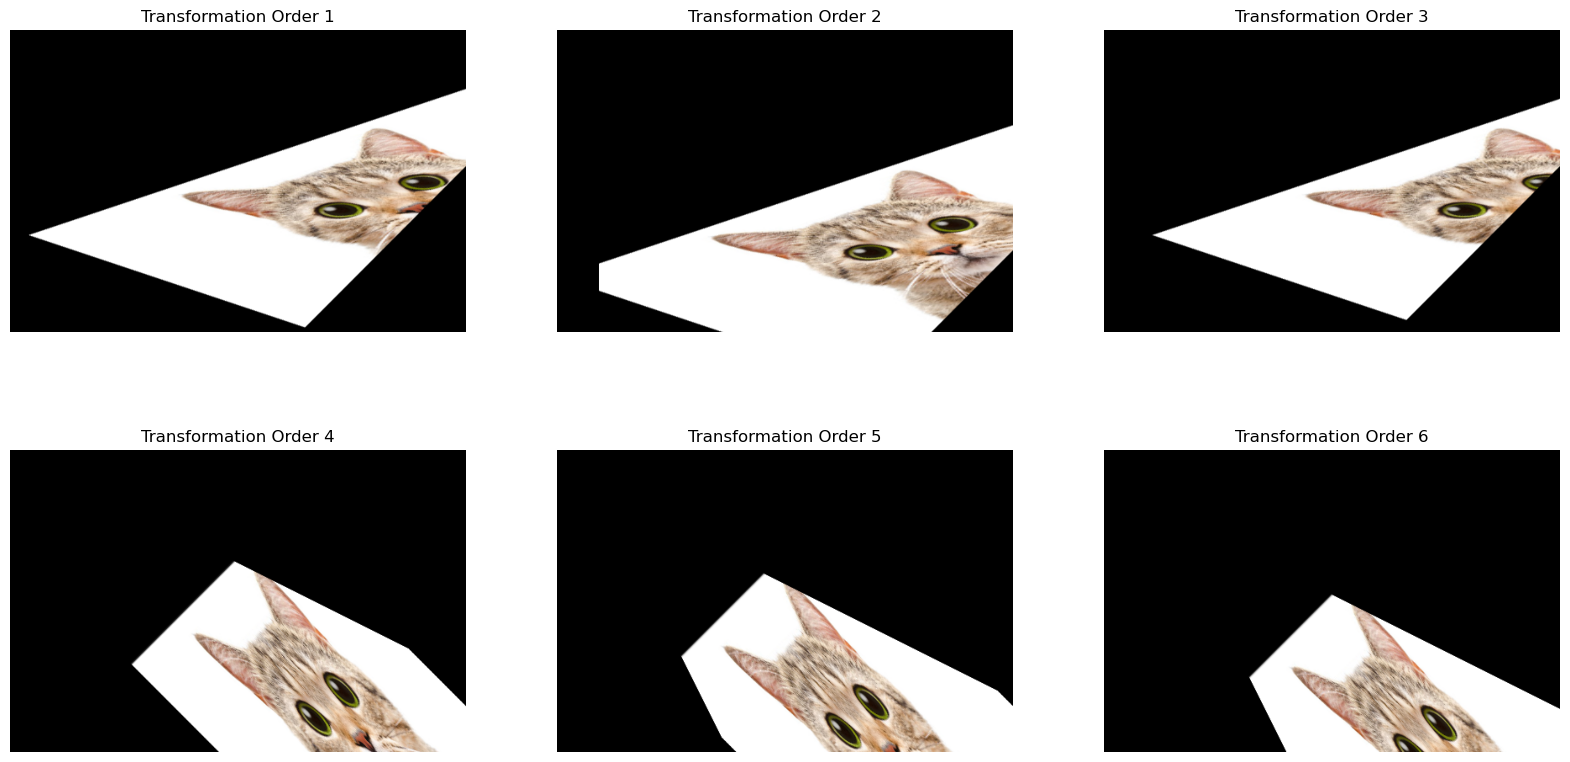

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = "./cat.jpg"  # Update with the correct path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width = image.shape[:2]

# Define the transformations
def apply_transformations(image, transformations):
    for transform in transformations:
        image = transform(image)
    return image

# Define the shear transformation
def shear(image):
    shear_matrix = np.float32([
        [1, 0.5, 0],
        [0.5, 1, 0]
    ])
    return cv2.warpAffine(image, shear_matrix, (width, height))

# Define the translation transformation
def translate(image):
    tx, ty = 50, 50
    translate_matrix = np.float32([
        [1, 0, tx],
        [0, 1, ty]
    ])
    return cv2.warpAffine(image, translate_matrix, (width, height))

# Define the rotation transformation
def rotate(image):
    center = (width // 2, height // 2)
    angle = 45
    rotate_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, rotate_matrix, (width, height))

# Apply the transformations in all possible orders
transformations_list = [
    (shear, translate, rotate),
    (shear, rotate, translate),
    (translate, shear, rotate),
    (translate, rotate, shear),
    (rotate, shear, translate),
    (rotate, translate, shear)
]

# Apply and display the results
plt.figure(figsize=(20, 10))
for i, transformations in enumerate(transformations_list):
    transformed_image = apply_transformations(image_rgb, transformations)
    plt.subplot(2, 3, i + 1)
    plt.imshow(transformed_image)
    plt.axis('off')
    plt.title(f'Transformation Order {i + 1}')
plt.show()


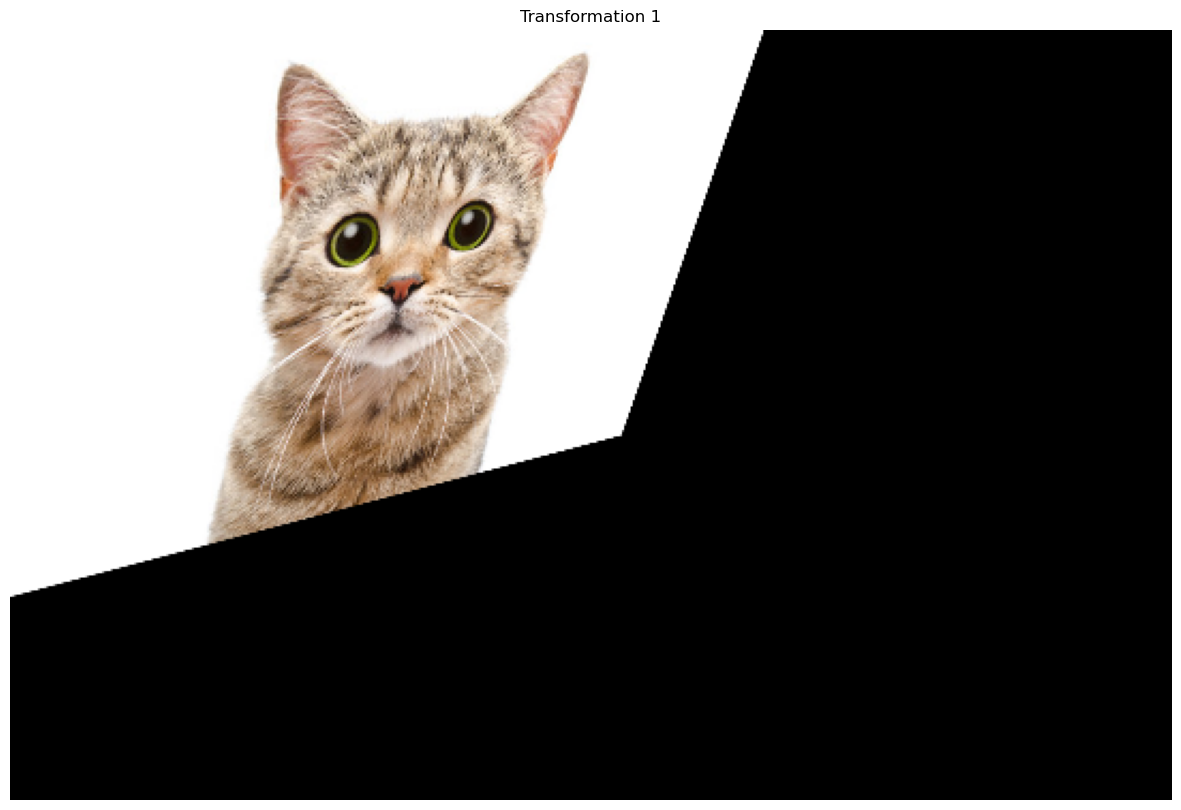

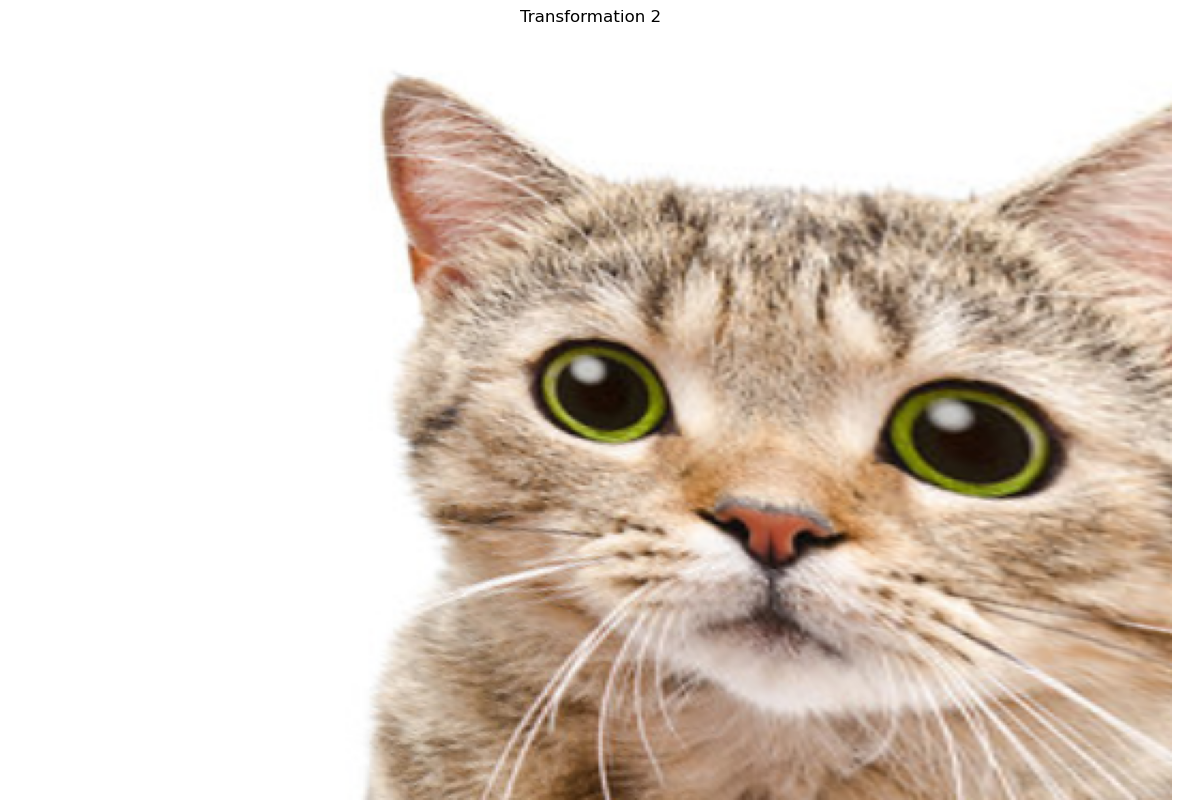

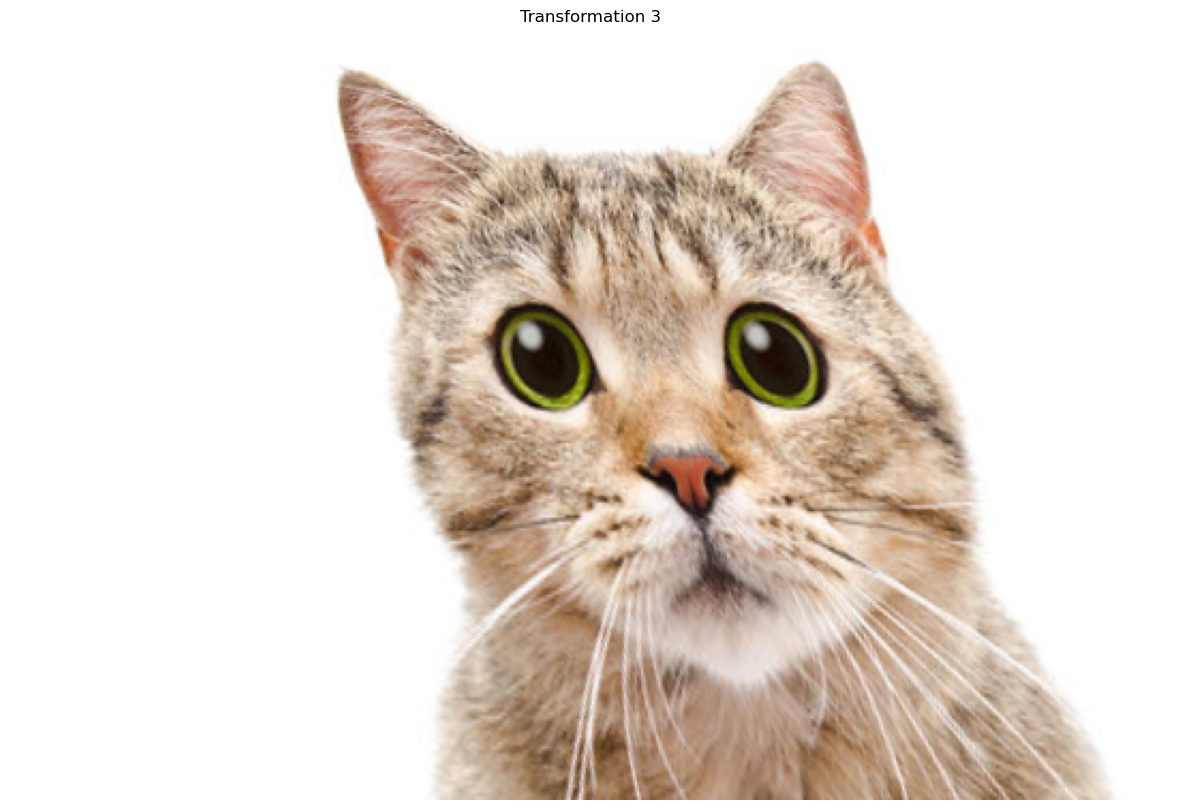

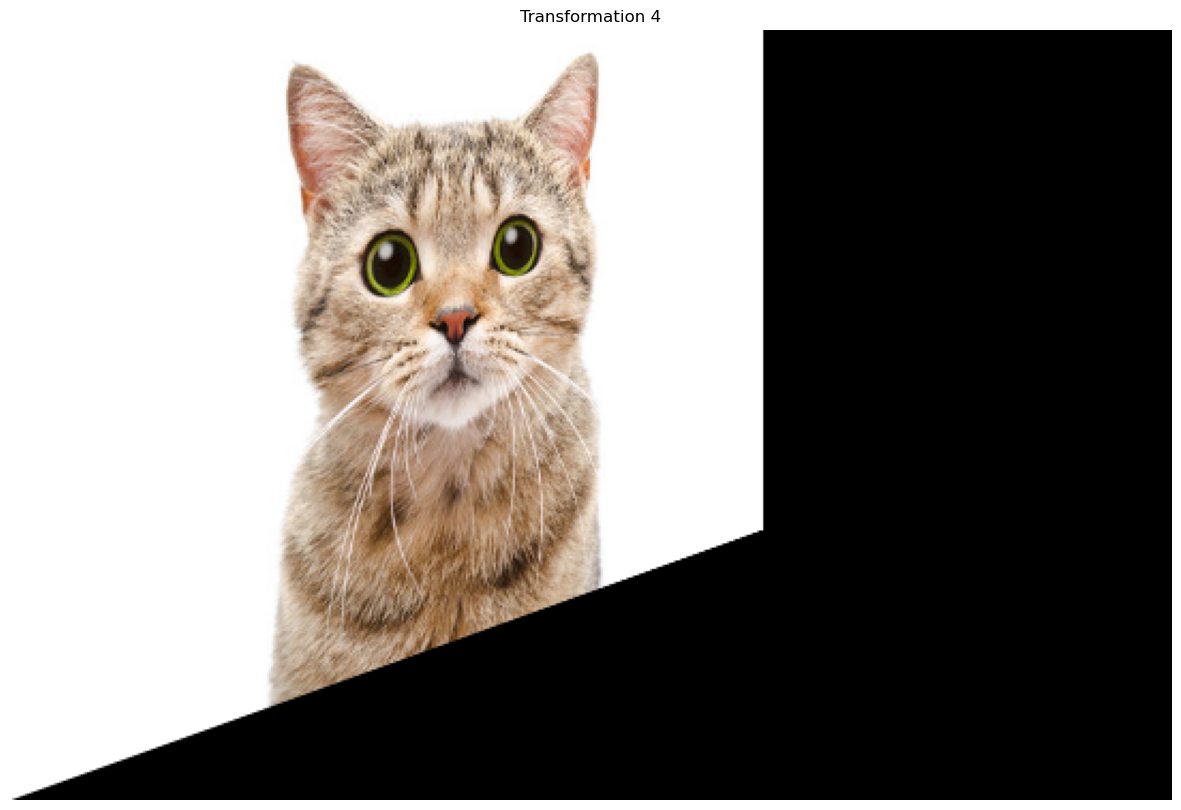

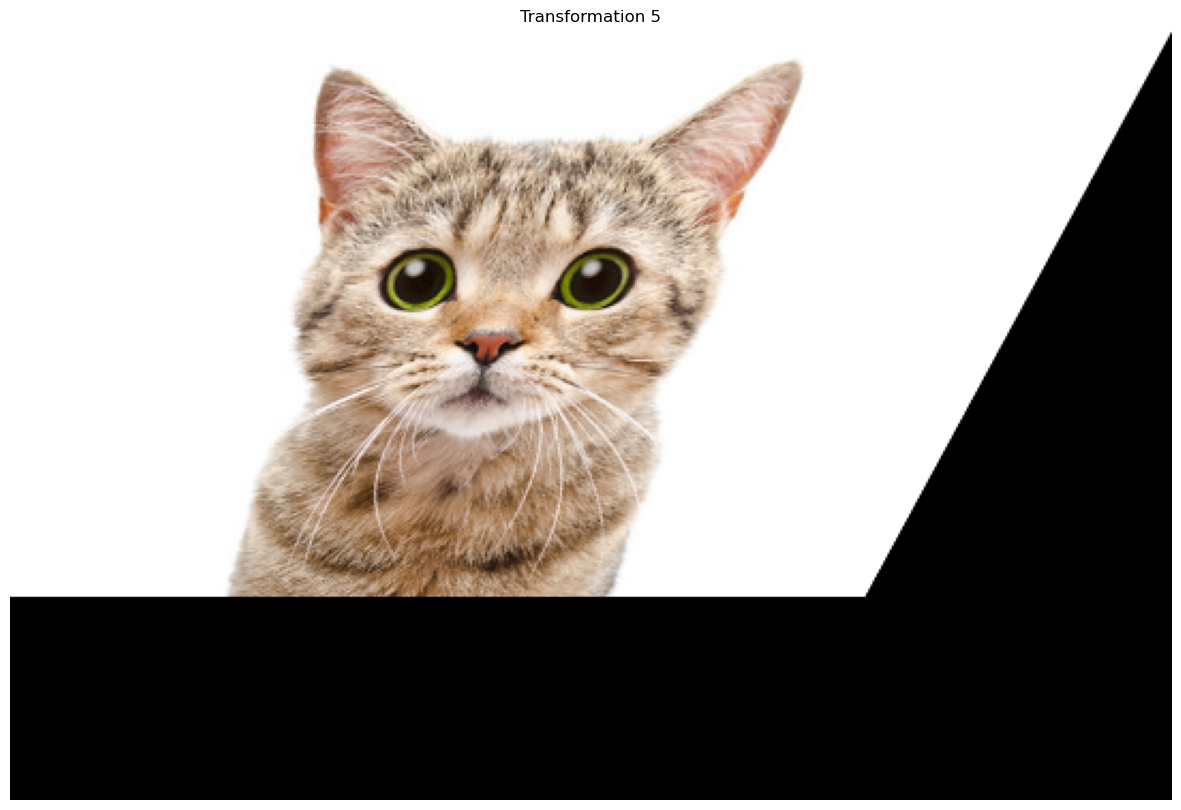

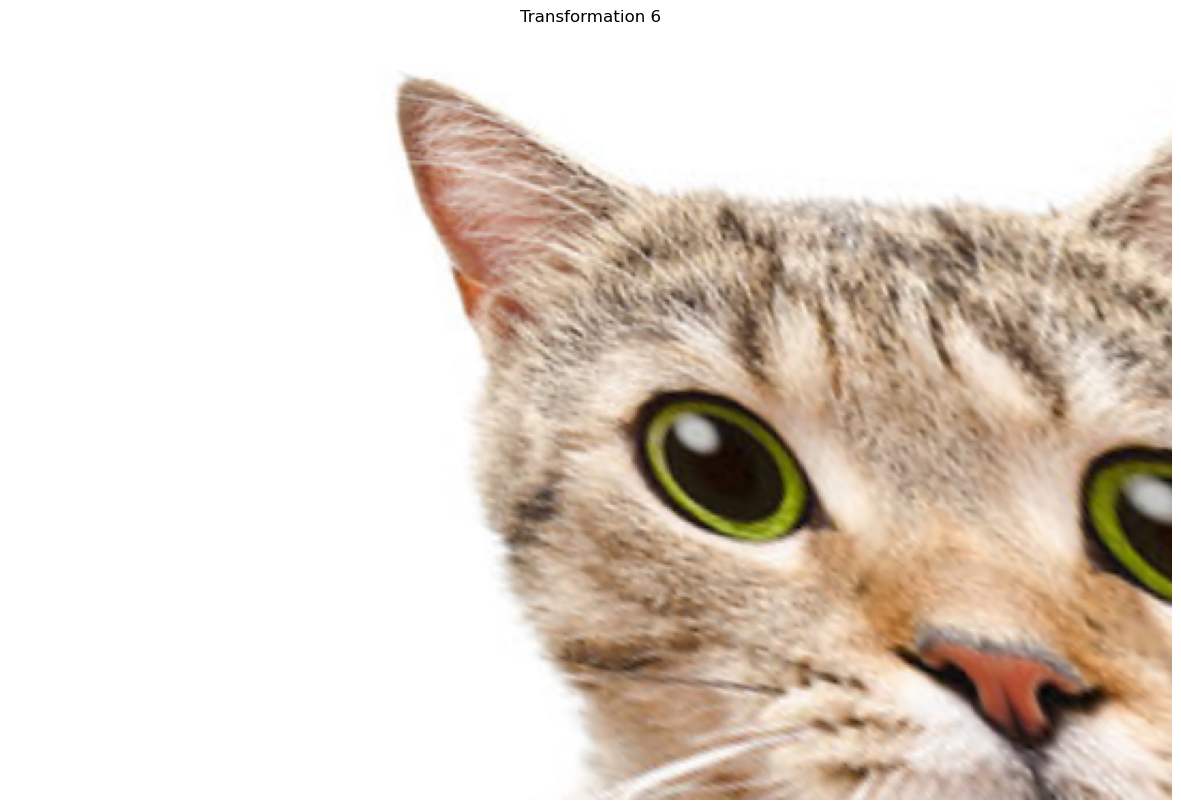

Transformation 1 Matrix:
[[1.    0.    0.   ]
 [0.    1.    0.   ]
 [0.001 0.001 1.   ]]

Transformation 2 Matrix:
[[ 1.     0.     0.   ]
 [ 0.     1.     0.   ]
 [-0.001  0.     1.   ]]

Transformation 3 Matrix:
[[ 1.     0.     0.   ]
 [ 0.     1.     0.   ]
 [ 0.    -0.001  1.   ]]

Transformation 4 Matrix:
[[1.    0.    0.   ]
 [0.    1.    0.   ]
 [0.001 0.    1.   ]]

Transformation 5 Matrix:
[[1.    0.    0.   ]
 [0.    1.    0.   ]
 [0.    0.001 1.   ]]

Transformation 6 Matrix:
[[ 1.     0.     0.   ]
 [ 0.     1.     0.   ]
 [-0.001 -0.001  1.   ]]



In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = "./cat.jpg"  # Update with the correct path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width = image.shape[:2]

# Define different projective transformations (homography matrices)
homography_matrices = [
    np.array([
        [1, 0, 0],
        [0, 1, 0],
        [0.001, 0.001, 1]
    ], dtype=float),  # Slight projective distortion

    np.array([
        [1, 0, 0],
        [0, 1, 0],
        [-0.001, 0.000, 1]
    ], dtype=float),

    np.array([
        [1, 0, 0],
        [0, 1, 0],
        [0.000, -0.001, 1]
    ], dtype=float),

        np.array([
        [1, 0, 0],
        [0, 1, 0],
        [0.001, 0.000, 1]
    ], dtype=float),

        np.array([
        [1, 0, 0],
        [0, 1, 0],
        [0.000, 0.001, 1]
    ], dtype=float),

    np.array([
        [1, 0, 0],
        [0, 1, 0],
        [-0.001, -0.001, 1]
    ], dtype=float)

]

# Apply the transformations and display the results
for i, H in enumerate(homography_matrices):
    plt.figure(figsize=(20, 10))
    transformed_image = cv2.warpPerspective(image_rgb, H, (width, height))
    plt.imshow(transformed_image)
    plt.axis('off')
    plt.title(f'Transformation {i + 1}')
    plt.show()

# Print the matrices used
for i, H in enumerate(homography_matrices):
    print(f"Transformation {i + 1} Matrix:\n{H}\n")
